# K Nearest Neighbors with Python

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## The Data

Let's start by reading in the Churn_Modelling.csv file into a pandas dataframe.

In [7]:
df = pd.read_csv('D:\\iAnalyst\\Machine Learning\\KNN\\Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Selection

In [9]:
df=df[['CreditScore','Age','Balance','EstimatedSalary','Tenure']]
df.head()

,CreditScore,Age,Balance,EstimatedSalary,Tenure
0,619,42,0.00,101348.88,2
1,608,41,83807.86,112542.58,1
2,502,42,159660.80,113931.57,8
3,699,39,0.00,93826.63,1
4,850,43,125510.82,79084.10,2


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()  #Standard Scalar converts the variables/features to N(0,1) i.e. mu+-3(sigma)^sq. It's range will be from -3 to +3

In [12]:
scaler.fit(df.drop('CreditScore',axis=1))

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop('CreditScore',axis=1))

In [16]:
df.drop('CreditScore',axis=1)

,Age,Balance,EstimatedSalary,Tenure
0,42,0.00,101348.88,2
1,41,83807.86,112542.58,1
2,42,159660.80,113931.57,8
3,39,0.00,93826.63,1
4,43,125510.82,79084.10,2
...,...,...,...,...
9995,39,0.00,96270.64,5
9996,35,57369.61,101699.77,10
9997,36,0.00,42085.58,7
9998,42,75075.31,92888.52,3


In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:])
df_feat.head()

,Age,Balance,EstimatedSalary,Tenure
0,0.293517,-1.225848,0.021886,-1.041760
1,0.198164,0.117350,0.216534,-1.387538
2,0.293517,1.333053,0.240687,1.032908
3,0.007457,-1.225848,-0.108918,-1.387538
4,0.388871,0.785728,-0.365276,-1.041760


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test_scaled)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['CreditScore'],
                                                    test_size=0.30)

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1),df['Exited'],
#                                                    test_size=0.30)

In [20]:
X_train[0:5,0:3]

array([[-0.75537207,  0.53827383, -0.9767207 ],
       [ 2.29594283, -1.22584767, -1.25196406],
       [-0.27860412,  0.21891669, -0.53788196],
       [ 0.29351742, -1.22584767, -0.23384485],
       [ 0.67493179, -1.22584767,  0.07271733]])

## Using KNN

Remember that we are trying to come up with a model to predict Credit Scores

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn = KNeighborsRegressor(n_neighbors=3,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

KNeighborsRegressor(n_neighbors=3)


In [23]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
pred = knn.predict(X_test)

In [25]:
pred

array([624.33333333, 688.33333333, 648.33333333, ..., 664.33333333,
       776.        , 636.33333333])

In [26]:
y_test[0:10]

9854    681
7482    718
7339    499
380     483
386     611
2315    662
5518    628
2914    604
9543    647
4550    579
Name: CreditScore, dtype: int64

## Predictions and Evaluations

Let's evaluate our KNN model!

In [27]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
print("RMSE with k=3 is ",sqrt(mean_squared_error(y_test,pred)))

#Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
#Residuals are a measure of how far from the regression line data points are; 
#RMSE is a measure of how spread out these residuals are. 
#In other words, it tells you how concentrated the data is around the line of best fit.
#RMSE between 0.2 to 0.5 shows the model can relatively predict the data accurately

RMSE with k=3 is  110.96408811796657


## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [29]:
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 138.27757109042184
RMSE value for k=  2 is: 117.98999675113706
RMSE value for k=  3 is: 110.96408811796657
RMSE value for k=  4 is: 108.04135213349254
RMSE value for k=  5 is: 106.22507720245096
RMSE value for k=  6 is: 105.06645145917045
RMSE value for k=  7 is: 104.52289405174534
RMSE value for k=  8 is: 103.61830253286176
RMSE value for k=  9 is: 102.88794346017914
RMSE value for k=  10 is: 102.22248151295618
RMSE value for k=  11 is: 101.7047605279595
RMSE value for k=  12 is: 101.18039374653424
RMSE value for k=  13 is: 101.00281013334404
RMSE value for k=  14 is: 100.69728062281489
RMSE value for k=  15 is: 100.52498263284272
RMSE value for k=  16 is: 100.17150766518725
RMSE value for k=  17 is: 99.94007688462486
RMSE value for k=  18 is: 99.81298693612526
RMSE value for k=  19 is: 99.78013138221402
RMSE value for k=  20 is: 99.56646463125355
RMSE value for k=  21 is: 99.34940102740887
RMSE value for k=  22 is: 99.33436970219438
RMSE value for k=  23 is: 

<AxesSubplot:>

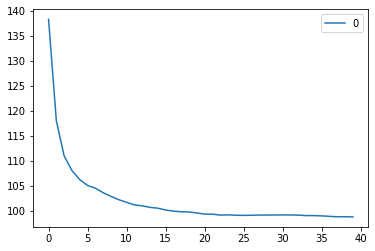

In [30]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.grid()

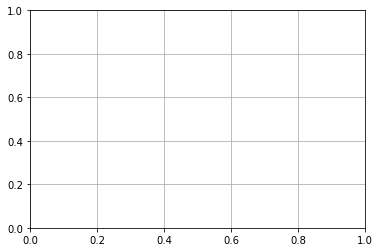

Here we can see that that after arouns K>10 the error rate just tends to hover around 0.06-0.05. So we will finalize k=10 as after 10 not much difference is seen in error. Let's retrain the model with that and check the classification report!

In [31]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL 
K=10
knn = KNeighborsRegressor(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} \n'.format(K))
print(sqrt(mean_squared_error(y_test,pred)))

WITH K=10 

102.22248151295618


In [32]:
pred

array([623.3, 648.9, 633.8, ..., 665.7, 696. , 625.2])